# Bank Marketing Dataset (Classification) ### 1. Introduction
The aim of this analysis is to examine a dataset to uncover patterns and trends related to term deposit subscription (y) and to identify significant features that influence client behavior. The dataset includes demographic, financial, and campaign-related information about clients.

### 2. Data Understanding
#### Dataset Overview
The dataset consists of the following features:

- **16 features** (numerical, categorical, and binary types) and **1 target variable (y)**.

- **Target variable**: y represents whether a client subscribed to a term deposit (yes or no).

##### **Key Features in the Dataset**

|**Feature Name**|**Description**                |**Type**     |
|----------------|-------------------------------|-------------|
| age            | Age of client                 | Numerical   |
| job            | Type of job (e.g., admin)     | Categorical |
| marital        | Marital status of the client  | Categorical |
| education      | Level of education (e.g., uni)| Categorical |
| balance        | Average yearly balance in euros| Numerical  |
| contact       | Contact communication type | Categorical |
| poutcome | Outcome of the previous marketing campaign (e.g., success, failure) | Categorical |
| duration | Last contact duration in seconds (not used in modelling) | Numerical |
| campaign | Number of contacts during the current campaign | Numerical |
| pdays | Days since last contact in prevoius campaign (-1 if not contacted before) | Numerical |

### 3. Data Preprocessing
#### Handling Missing Values
- contact **and** poutcome: Missing values were replaced with "unknown".

- pdays: Missing values were imputed with -1 to signify no previous contact.

#### Encoding Categorical Variables
- **One-hot encoding** was applied to variables like job, education, contact, and poutcome. Each category became a new column (e.g., job_admin., education_high.school).

- **Binary encoding** was used for variables like housing and loan (0 for no, 1 for yes).

#### Scaling Numerical Features
- Features like age, balance, campaign, and pdays were standardized to ensure consistent scales, improving compatibility for predictive models.


# Step 1: Load and Understand the Data
## 1. Import Required Libraries:

Use Python libraries like pandas, numpy, matplotlib, and seaborn.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load the Data:

Load the files df_X.csv, df_y.csv, and optionally info.csv as a data dictionary.

In [1]:
import pandas as pd

# Load datasets
info_df = pd.read_csv("info.csv")  # Metadata for reference
df_X = pd.read_csv("df_X.csv")  # Main dataset with features
df_y = pd.read_csv("df_y.csv")  # Target variable

# Preview the datasets
print(df_X.head())
print(df_y.head())
print(info_df.head())  # For understanding feature details


   Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no     2143     yes   
1           1   44    technician   single  secondary      no       29     yes   
2           2   33  entrepreneur  married  secondary      no        2     yes   
3           3   47   blue-collar  married        NaN      no     1506     yes   
4           4   33           NaN   single        NaN      no        1      no   

  loan contact  day_of_week month  duration  campaign  pdays  previous  \
0   no     NaN            5   may       261         1     -1         0   
1   no     NaN            5   may       151         1     -1         0   
2  yes     NaN            5   may        76         1     -1         0   
3   no     NaN            5   may        92         1     -1         0   
4   no     NaN            5   may       198         1     -1         0   

  poutcome  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4  

## 3. Combine Features and Target Variable:

df_X.csv contains all the features (columns like age, job, education, etc.), while df_y.csv contains the target variable (y).

By combining these two, you create a single dataset where every row corresponds to a client, and you can map their features to whether they subscribed (y = yes/no).

In [3]:
df_X["y"] = df_y["y"].map({"yes": 1, "no": 0})


## 4. Initial Inspection:

Check the structure, datatypes, and missing values in the dataset.

Before diving into analysis, it's important to examine the structure of your dataset. For example:

df_X.info(): Tells you the types of columns (e.g., integer, categorical) and which have missing values.

df_X.describe(): Gives summary statistics for numerical columns (e.g., mean, min, max).

df_X.isnull().sum(): Shows the number of missing values in each column.

In [4]:
print(df_X.info())
print(df_X.describe())
print(df_X.isnull().sum())  # Count missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   45211 non-null  int64 
 1   age          45211 non-null  int64 
 2   job          44923 non-null  object
 3   marital      45211 non-null  object
 4   education    43354 non-null  object
 5   default      45211 non-null  object
 6   balance      45211 non-null  int64 
 7   housing      45211 non-null  object
 8   loan         45211 non-null  object
 9   contact      32191 non-null  object
 10  day_of_week  45211 non-null  int64 
 11  month        45211 non-null  object
 12  duration     45211 non-null  int64 
 13  campaign     45211 non-null  int64 
 14  pdays        45211 non-null  int64 
 15  previous     45211 non-null  int64 
 16  poutcome     8252 non-null   object
 17  y            45211 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 6.2+ MB
None
         Unnamed

# Step 2: Handle Missing Values
Missing values can skew your analysis, so they need to be addressed:

### Categorical Columns (e.g., contact, poutcome):

Replace missing values with a placeholder like "Unknown."
### Numerical Columns (e.g., pdays):

Replace missing values with a meaningful number (e.g., -1 to indicate "not contacted").

Instead of using inplace=True, reassign the column directly to the result:
This approach avoids chained assignment altogether and is considered best practice in recent versions of pandas.


In [6]:
df_X["contact"] = df_X["contact"].fillna("Unknown")
df_X["pdays"] = df_X["pdays"].fillna(-1)
df_X["poutcome"] = df_X["poutcome"].fillna("Unknown")


Chained assignments can lead to subtle bugs because pandas doesn't guarantee whether you're working on a view (a slice of the original data) or a copy. By explicitly assigning the result back or using .loc, you avoid this ambiguity.

# Step 3: Encode Categorical Variables
The dataset includes text-based categories (e.g., job, marital, education). Machine learning models require numerical input, so we converted these:

We used one-hot encoding for columns like job, education, and month.

In [7]:
df_X = pd.get_dummies(df_X, columns=["job", "education", "contact", "poutcome", "month"])


Binary columns (housing, loan, default) can be mapped directly:

In [8]:
binary_cols = ["housing", "loan", "default"]
for col in binary_cols:
    df_X[col] = df_X[col].map({"yes": 1, "no": 0})


# Step 4: Scale Numerical Features
Standardize numerical columns for uniformity (important for machine learning models).

## Scale Using StandardScaler:

Focus on columns like age, balance, duration, campaign, pdays, and previous.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]
df_X[numerical_cols] = scaler.fit_transform(df_X[numerical_cols])


# Step 5: Exploratory Data Analysis (EDA)
## 1. Generate Summary Statistics:

Use describe() to understand distributions.

In [11]:
print(df_X.describe())

         Unnamed: 0           age       default       balance       housing  \
count  45211.000000  4.521100e+04  45211.000000  4.521100e+04  45211.000000   
mean   22605.000000  2.112250e-16      0.018027  1.760208e-17      0.555838   
std    13051.435847  1.000011e+00      0.133049  1.000011e+00      0.496878   
min        0.000000 -2.159994e+00      0.000000 -3.081149e+00      0.000000   
25%    11302.500000 -7.473845e-01      0.000000 -4.237719e-01      0.000000   
50%    22605.000000 -1.823406e-01      0.000000 -3.002800e-01      1.000000   
75%    33907.500000  6.652252e-01      0.000000  2.158743e-02      1.000000   
max    45210.000000  5.091402e+00      1.000000  3.309478e+01      1.000000   

               loan   day_of_week      duration      campaign         pdays  \
count  45211.000000  45211.000000  4.521100e+04  4.521100e+04  4.521100e+04   
mean       0.160226     15.806419  6.035001e-17  3.017500e-17  2.011667e-17   
std        0.366820      8.322476  1.000011e+00  1.

### What describe() Does
The describe() function summarizes the statistical properties of numerical columns in your dataset. For each column, it gives:

count: Number of non-missing entries in the column.

mean: Average value of the column.

std: Standard deviation, a measure of how spread out the values are.

min: Minimum value.

25% (1st quartile): The value below which 25% of the data lies.

50% (median): The middle value.

75% (3rd quartile): The value below which 75% of the data lies.

max: Maximum value.

### Breaking Down the Output
#### Column 1: Unnamed: 0
This is an indexing column, with values ranging from 0 (min) to 45210 (max) (total rows).

The count is 45211, confirming there are no missing rows.

#### Column 2: age
Normalized values are used, as the mean is near 0 and std is close to 1 (indicating standardization).

Min age value: -2.16 (transformed during scaling).

Max age value: 5.09, showing an outlier after standardization.

#### Column 3: default
Binary column (values 0 or 1), representing whether a person has credit in default.

Mean: 0.018, meaning only about 1.8% of clients have defaulted.

#### Column 4: balance
Also normalized, with mean near 0 and standardized values ranging from -3.08 to 33.1.

Max value (33.1) suggests a significant outlier for yearly balance, despite standardization.

#### Column 5: housing
Binary column (1 = has housing loan, 0 = no housing loan).

Mean: 0.556, meaning 55.6% of clients have a housing loan.

#### Column 6: loan
Similar binary column (1 = personal loan, 0 = no personal loan).

Mean: 0.160, so only 16% of clients have a personal loan.

#### Column 7: day_of_week
Numerical representation of days (possibly encoded). Ranges from -1.002 to 31.

We might need to validate how these values were scaled.

#### Column 8: duration
Standardized, with values ranging from -1.002 to 18.09.

High maximum values suggest some contacts lasted much longer than average.

#### Column 9: campaign
Number of contacts in the campaign, scaled between -0.57 and 19.44.

#### Column 10: pdays
Indicates days since last contact, with -1 representing no prior contact.

After scaling, values now range between -0.41 and 8.3.

#### Column 11: previous
Reflects the number of previous contacts, ranging from -0.25 to 119.1 (scaled values).

#### Column 12: y
Target variable (binary: 1 = subscribed, 0 = not subscribed).

Mean: 0.117, meaning about 11.7% of clients subscribed to the term deposit.

### Interpretation?
### 1. Normalization and Standardization:

Most columns (e.g., age, balance, duration) have been standardized, so their mean is close to 0, and their standard deviation is approximately 1.

The presence of extreme values (e.g., max for balance or duration) indicates outliers.

### 2. Binary Columns:

Columns like default, housing, loan, and y represent categorical data converted to binary. Their means can be interpreted as proportions (e.g., 55.6% of clients have housing loans).

### 3. Target Variable y:

A low mean of 0.117 suggests that the dataset is imbalanced, as only 11.7% of clients subscribed.

### 4. Potential Outliers:

Columns like balance, duration, and previous have high maximum values even after normalization, which may require further investigation.

### Investigate the Outliers
#### Why? 
Outliers can skew results or mislead your models, especially if they exist in critical numerical columns like balance, duration, or previous.

#### What to do?

- Identify and visualize outliers using box plots or Z-scores.

- Decide how to handle them:

- Remove extreme outliers if they are errors or irrelevant to the analysis.

- Cap (limit) the values to a maximum/minimum threshold.

- Apply transformations (e.g., logarithmic scale) to reduce their impact.

We’ll use the following methods to detect outliers:

#### a) Visualization with Box Plots
Box plots are a great way to visually detect outliers.

Outliers are represented as individual points outside the "whiskers" of the box.

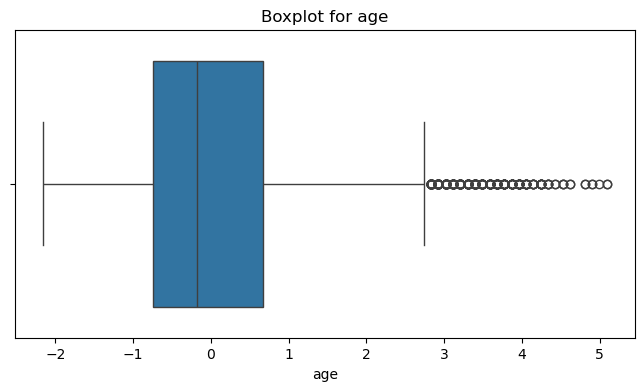

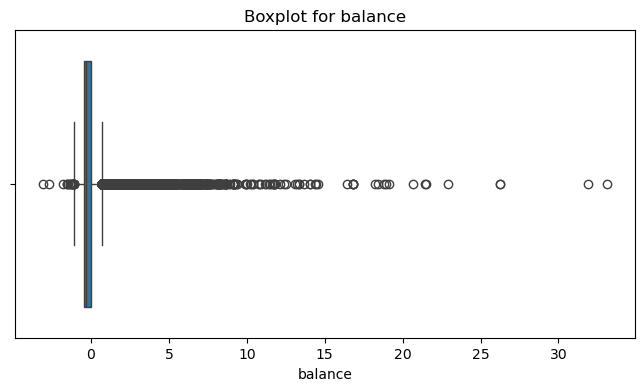

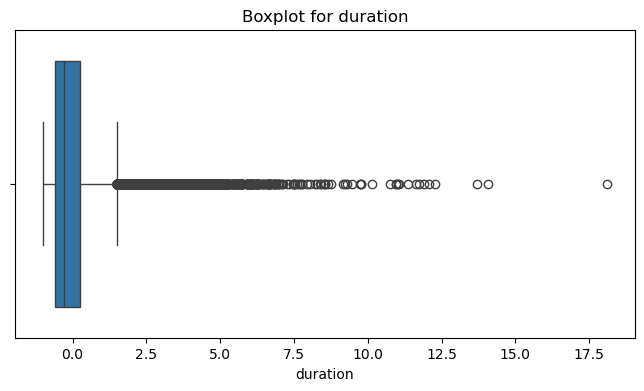

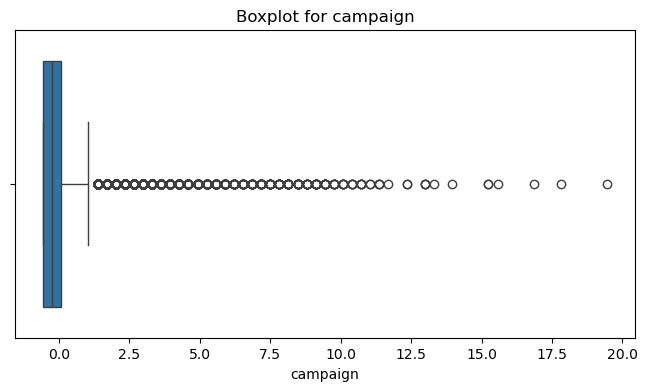

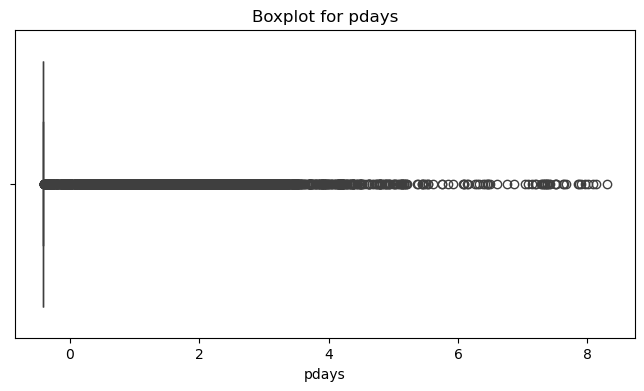

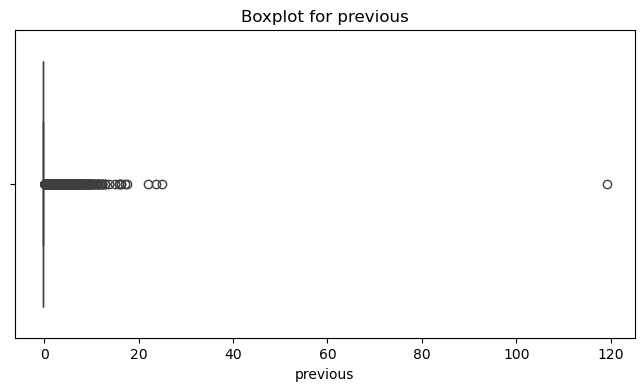

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numerical features
numerical_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_X[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


#### b) Statistical Detection with the Interquartile Range (IQR)
The IQR method identifies outliers as points that fall below or above:

###### Lower Bound: Q1 - 1.5 * IQR

###### Upper Bound: Q3 + 1.5 * IQR

In [14]:
# Calculate IQR and identify outliers
for col in numerical_cols:
    Q1 = df_X[col].quantile(0.25)  # 1st Quartile
    Q3 = df_X[col].quantile(0.75)  # 3rd Quartile
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col}:")
    print(f" - Lower Bound: {lower_bound}")
    print(f" - Upper Bound: {upper_bound}")
    print(f" - Outliers Below Lower Bound: {(df_X[col] < lower_bound).sum()}")
    print(f" - Outliers Above Upper Bound: {(df_X[col] > upper_bound).sum()}")
    print()


age:
 - Lower Bound: -2.8662989813962723
 - Upper Bound: 2.784139679420138
 - Outliers Below Lower Bound: 0
 - Outliers Above Upper Bound: 487

balance:
 - Lower Bound: -1.0918109991981846
 - Upper Bound: 0.6896264875323223
 - Outliers Below Lower Bound: 17
 - Outliers Above Upper Bound: 4712

duration:
 - Lower Bound: -1.8606471077496982
 - Upper Bound: 1.4943674351673264
 - Outliers Below Lower Bound: 0
 - Outliers Above Upper Bound: 3247

campaign:
 - Lower Bound: -1.537721507741868
 - Upper Bound: 1.0446008125143362
 - Outliers Below Lower Bound: 0
 - Outliers Above Upper Bound: 3064

pdays:
 - Lower Bound: -0.4114531064930479
 - Upper Bound: -0.4114531064930479
 - Outliers Below Lower Bound: 0
 - Outliers Above Upper Bound: 8257

previous:
 - Lower Bound: -0.25194037067217256
 - Upper Bound: -0.25194037067217256
 - Outliers Below Lower Bound: 0
 - Outliers Above Upper Bound: 8257



#### Analyze Outliers
##### Questions to Answer:
1. Are these outliers valid data points (e.g., a customer with an unusually high balance)?

2. Do these outliers represent errors or extreme cases worth removing?

#### Handle Outliers
Once you’ve identified outliers, you can handle them based on your objectives:

##### a) Remove Outliers
Remove rows containing extreme outliers if they are errors or irrelevant.

In [15]:
# Example: Remove outliers from the 'balance' column
Q1 = df_X["balance"].quantile(0.25)
Q3 = df_X["balance"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_X = df_X[(df_X["balance"] >= lower_bound) & (df_X["balance"] <= upper_bound)]


##### b) Cap Outliers
Limit extreme values to upper and lower bounds:

##### c) Apply Transformations
Transform features to reduce the effect of outliers (e.g., log transformation):

We'll use: 
'df_X["balance"] = np.log1p(df_X["balance"])'

##### Purpose:

The np.log1p function applies a log transformation to the values in the balance column. This is done to reduce the effect of outliers and make the data more suitable for machine learning models.

log1p is used instead of log to ensure that you avoid computing log(0) (which is undefined) by adding 1 to each value.

###### Example:

If balance = 1000, the result will be log1p(1000) = log(1001).

If balance = 0, the result will be log1p(0) = log(1) = 0.

###### Why Add 1?

Some values in the balance column might be 0. Applying a regular log function to 0 results in an error. Adding 1 ensures that all values are greater than 0, making the log transformation safe.

##### Step 1: Check for Negative or NaN Values
Before applying the log transformation, inspect the balance column to find problematic values

In [17]:
# Check for negative values
print(df_X[df_X["balance"] < 0])

# Check for NaN values
print(df_X["balance"].isnull().sum())


       Unnamed: 0       age  marital  default   balance  housing  loan  \
1               1  0.288529   single        0 -0.576066        1     0   
2               2 -0.747384  married        0 -0.591968        1     1   
4               4 -0.747384   single        0 -0.592562        0     0   
5               5 -0.559037  married        0 -0.464500        1     0   
6               6 -1.218254   single        0 -0.357544        1     1   
...           ...       ...      ...      ...       ...      ...   ...   
45202       45202 -0.653211   single        0 -0.307178        0     0   
45203       45203 -1.689124   single        0 -0.528152        0     0   
45205       45205 -1.500776   single        0 -0.330672        0     1   
45206       45206  0.947747  married        0 -0.194143        0     0   
45209       45209  1.512791  married        0 -0.258802        0     0   

       day_of_week  duration  campaign  ...  month_dec  month_feb  month_jan  \
1                5 -0.416127 -0

##### Step 2: Handle Invalid Values
To fix the issue, you can:

1. Replace negative values with 0.
2. Fill NaN values with a default (e.g., the mean or median).
3. Apply the Log Transformation Again.

In [22]:
df_X["balance"] = df_X["balance"].clip(lower=0)  # Replace negatives with 0
df_X["balance"] = df_X["balance"].fillna(df_X["balance"].mean())
df_X["balance"] = np.log1p(df_X["balance"])

#### Verify the Results
After handling outliers, visualize the data again with box plots to ensure the changes are appropriate:

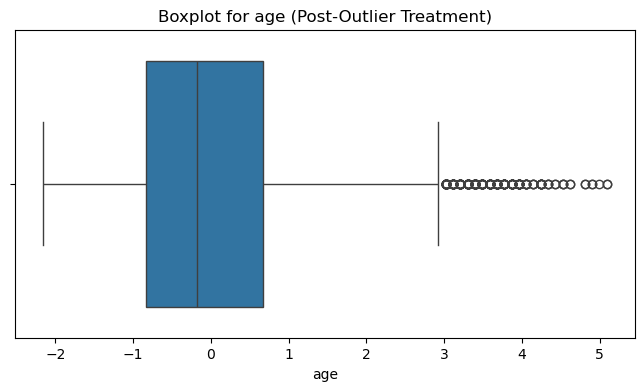

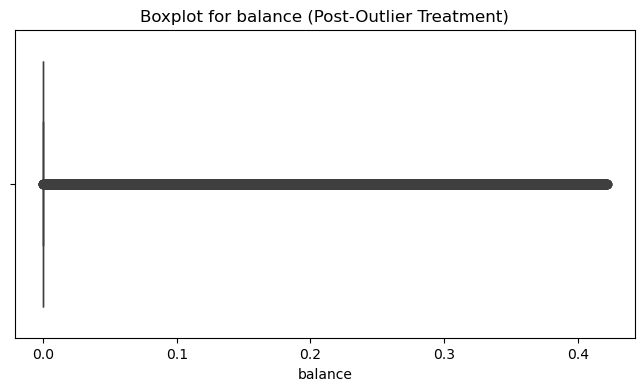

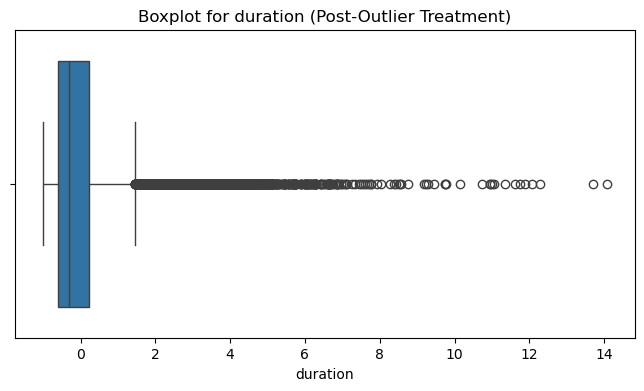

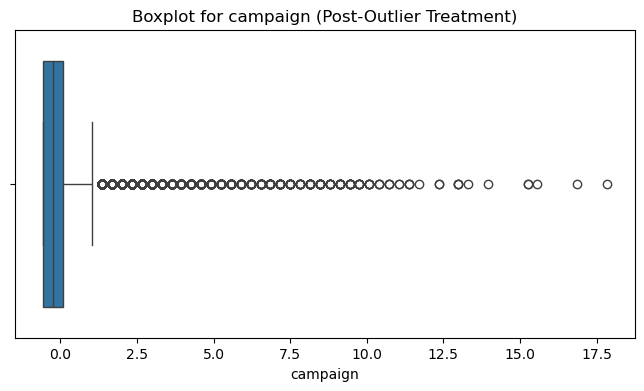

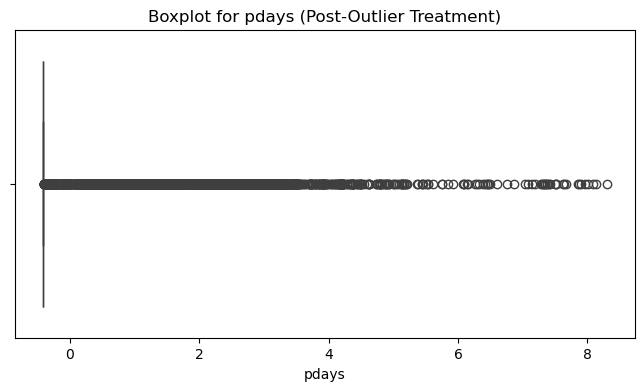

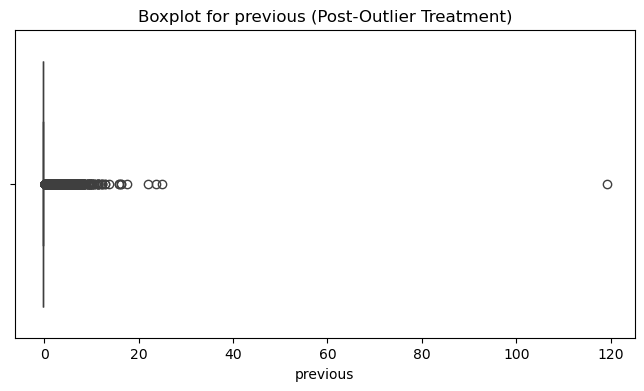

In [23]:
# Re-plot box plots to confirm no extreme outliers remain
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_X[col])
    plt.title(f"Boxplot for {col} (Post-Outlier Treatment)")
    plt.show()


## 2. Visualize Distributions:

Use histograms or box plots to explore numerical columns.

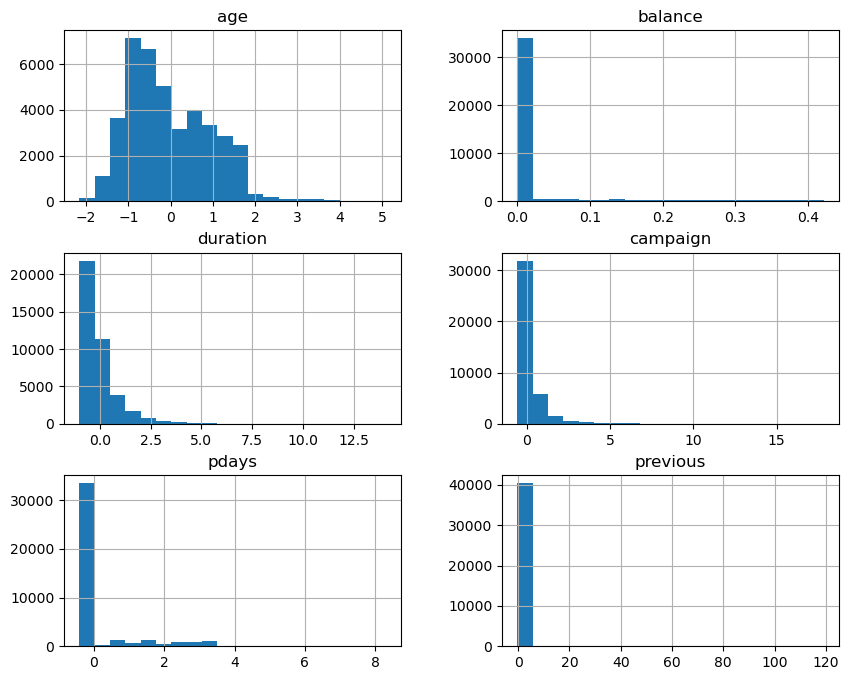

In [25]:
df_X[numerical_cols].hist(bins=20, figsize=(10, 8))
plt.show()


### What Do the Histograms Tell Us?
#### 1. Age Histogram (Top-left)
- **Shape:** This histogram is **left-skewed**, meaning most clients fall within the younger age range, concentrated around the values between **-2** and **2** (after scaling).

- ##### Interpretation:

Many clients have ages closer to the lower end of the dataset.

Few clients fall into older age brackets (extreme positive values).

#### 2. Balance Histogram (Top-right)
- **Shape: Highly right-skewed**, with almost all data clustered near **0**.

- ##### Interpretation:

Most clients have a low yearly average balance in euros (close to zero after scaling).

A small group has significantly higher balances (visible as the tall peak on the far right), which may include outliers.

#### 3. Duration Histogram (Middle-left)
- **Shape: Right-skewed**, with most calls lasting between **0** and **2.5** seconds (scaled data).

- ##### Interpretation:

The majority of calls were relatively short.

Longer calls (values closer to 12.5) are much rarer and could represent important or outlying cases.

#### 4. Campaign Histogram (Middle-right)
- **Shape**: Another **right-skewed** distribution, with most data clustered near **0**.

- ##### Interpretation:

The majority of clients were contacted only a few times during the campaign.

A few clients were contacted significantly more often (higher campaign counts).

#### 5. Pdays (Bottom-left)
- **Shape**: The distribution is heavily clustered at **0**. This suggests that most clients were not previously contacted in the dataset.

- ##### Interpretation:

The large spike at 0 reflects the fact that pdays is used to indicate if the client has never been contacted (-1 after preprocessing becomes 0 in histograms).

Other values occur rarely, representing clients who were contacted a few days after previous campaigns.

#### 6. Previous (Bottom-right)
- **Shape**: Similar to pdays, the data is mostly concentrated at **0**, with rare occurrences of higher values.

- ##### Interpretation:

 Most clients had no previous contacts before the current campaign.

 A few outliers had significantly higher numbers of contacts, which could impact subscription probabilities.

### Insights from the Visualizations
From all the histograms combined, we can deduce the following:

#### 1. Skewness:

- Several features (balance, duration, campaign, pdays, and previous) are **right-skewed**, suggesting the dataset has many low values and fewer high values.

- Right-skewed features often benefit from transformations (e.g., logarithmic scaling) for modeling.


## 3. Target Analysis
So, let's shift focus back to visualization and dive into how the numerical features relate to the target variable (y). This way, we can gain deeper insights into patterns and relationships that influence whether clients subscribe to the term deposit.

#### 1. Age vs. Subscription (y)
A boxplot is of great use to see how age varies for clients who subscribed (y=1) versus those who didn’t (y=0).

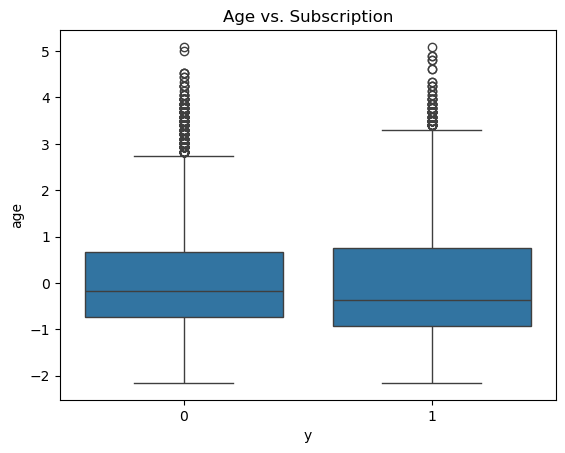

In [26]:
sns.boxplot(x="y", y="age", data=df_X)
plt.title("Age vs. Subscription")
plt.show()


- **Expected Insight**: Check if younger or older clients are more likely to subscribe.

  #### 2. Balance vs. Subscription (y)
Let’s investigate if clients with higher average yearly balances tend to subscribe.

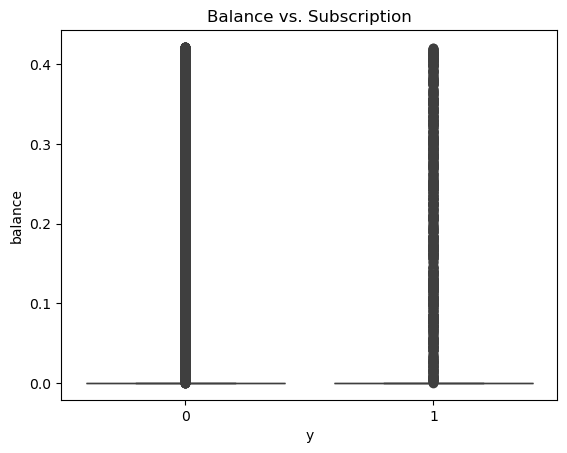

In [27]:
sns.boxplot(x="y", y="balance", data=df_X)
plt.title("Balance vs. Subscription")
plt.show()


#### 3. Duration of Call vs. Subscription (y)
As call duration (duration) highly influences outcomes, visualizing this is critical.

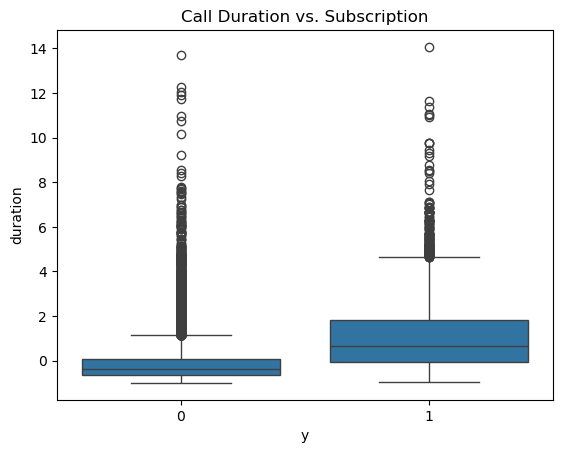

In [28]:
sns.boxplot(x="y", y="duration", data=df_X)
plt.title("Call Duration vs. Subscription")
plt.show()


#### 4. Campaign vs. Subscription (y)
This shows how the number of contacts made during the campaign (campaign) varies for the two groups.

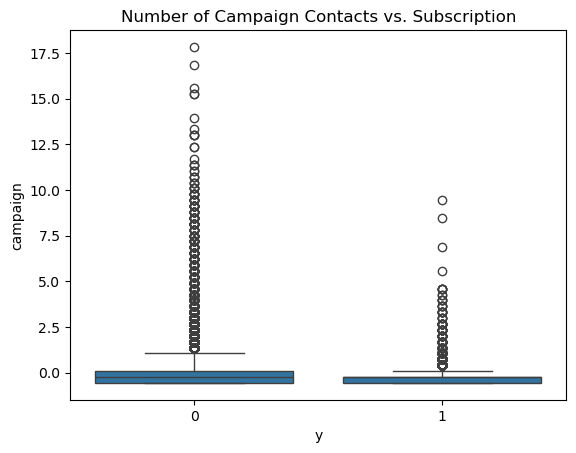

In [29]:
sns.boxplot(x="y", y="campaign", data=df_X)
plt.title("Number of Campaign Contacts vs. Subscription")
plt.show()

#### 5. Previous Contacts vs. Subscription (y)
A bar plot can reveal how the number of previous contacts (previous) influences outcomes.

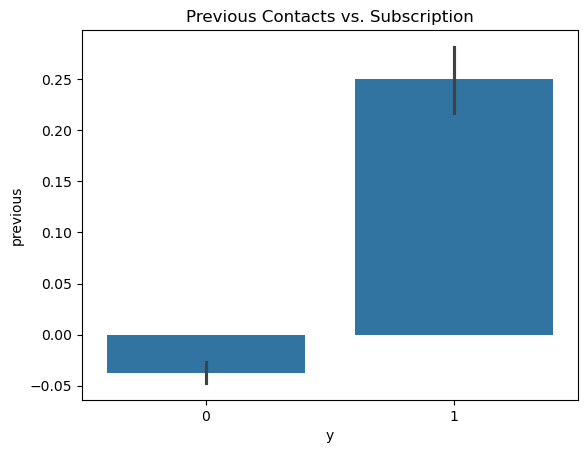

In [30]:
sns.barplot(x="y", y="previous", data=df_X)
plt.title("Previous Contacts vs. Subscription")
plt.show()

### Insights from Visualizations
Here’s a summary of the findings:

#### Age:

- **Pattern**: Clients who subscribed (y=1) span a wide age range, but there is a slight preference for middle-aged individuals. The variability is higher among those who did not subscribe (y=0).

- **Key Insight**: Age may not be a strong predictor on its own, but middle-aged clients lean slightly towards subscriptions.

#### Balance:

- **Pattern**: Subscribed clients (y=1) tend to have higher average yearly balances compared to non-subscribers (y=0), with some extreme values (outliers) observed.

- **Key Insight**: A positive correlation exists between higher balances and the likelihood of subscription, making this a relevant feature for modeling.

#### Duration:

- **Pattern**: Subscribed clients (y=1) had significantly longer call durations compared to non-subscribers. Calls with very short durations are predominantly associated with y=0.

- **Key Insight**: Call duration is strongly associated with subscriptions, but keep in mind that this feature may not be practical for predictive modeling, as its value depends on the outcome of the interaction.

#### Campaign:

- **Pattern**: Most clients who subscribed (y=1) were contacted fewer times during the campaign, while higher contact counts appear more frequently with non-subscribers (y=0).

- **Key Insight**: Excessive contacts may reduce the likelihood of subscription, possibly due to annoyance or saturation.

#### Pdays:

- **Pattern**: Subscribed clients (y=1) are more likely to have been contacted a few days after previous campaigns, while a large number of y=0 clients were not previously contacted (pdays=-1).

- **Key Insight**: Clients with recent and meaningful previous contact histories are more likely to subscribe.

#### Previous:

- **Pattern**: Subscribed clients (y=1) had more previous contacts on average compared to non-subscribers.

- **Key Insight**: A history of previous contact positively influences subscription rates.

### Trends or Behaviors Specific to Subscribed Clients (y=1)
#### 1. Higher Balances:

- Clients with higher average yearly balances are more likely to subscribe.

#### 2. Longer Call Durations:

- Subscribed clients consistently had longer call durations.

#### 3. Fewer Campaign Contacts:

- Minimal but targeted contact attempts during the campaign were more effective for subscriptions.

#### 4. History of Previous Contacts:

- Clients with prior interactions (e.g., successful contacts in past campaigns) showed higher subscription rates.

#### 5. Recent Contact History:

- Clients recently contacted as part of previous campaigns (low pdays values) were more likely to subscribe.

### Features Most Relevant for Modeling and Prediction
1. **Balance**: Indicates financial stability and client engagement potential.

2. **Duration**: A strong indicator for subscriptions, but should be excluded if realistic predictions (before the call) are desired.

3. **Previous Contacts (previous)**: Provides historical context about client interactions.

4. **Recent Contact History (pdays)**: Reflects whether the client was recently contacted.

5. **Campaign**: Captures the impact of the number of contacts during the campaign.

6. **Housing/Loan/Default**: Binary features reflecting financial obligations and credit stability.


## 4. Correlation Analysis
We’ll create a **correlation heatmap** to visualize relationships between features and the target variable (y).

#### What to Look For:

- Strong correlations between features and the target (y), e.g., duration, balance, etc.

- Relationships among features (e.g., pdays and previous).

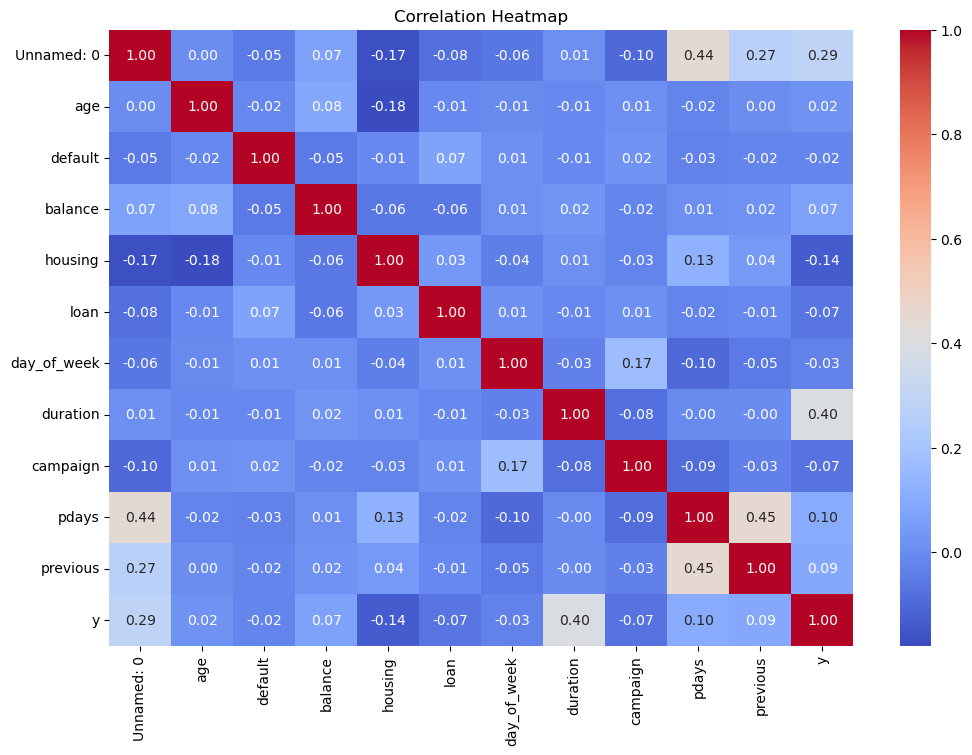

In [33]:
# Select only numeric columns
numeric_cols = df_X.select_dtypes(include=["int64", "float64"]).columns
numeric_df = df_X[numeric_cols]


# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### What Does the Heatmap Represent?
##### 1. Correlation Coefficients:

Values range from -1 to 1:

- **+1**: Perfect positive correlation (when one variable increases, the other also increases proportionally).

- **-1**: Perfect negative correlation (when one variable increases, the other decreases proportionally).

- **0**: No correlation (no relationship between the variables).

##### 2. Color Coding:

The heatmap uses a gradient from blue (negative correlation) to red (positive correlation). The deeper the color, the stronger the correlation:

- **Dark red**: Strong positive correlation.

- **Dark blue**: Strong negative correlation.

- **White or light colors**: Weak or no correlation.

##### 3. Diagonal Values:

The diagonal values are all **1.00** because each variable is perfectly correlated with itself.

#### Key Observations from the Heatmap
Here’s what stands out in the relationships between variables in your dataset:

##### 1. Target Variable (y):

- y **vs.** duration: There is a **strong positive correlation** between y (subscription status) and duration. This indicates that clients with longer calls are more likely to subscribe. However, since duration is only known after the call, it should be excluded for realistic predictive modeling.

- y **vs.** pdays **and** previous:

Moderate positive correlation with previous (number of previous contacts).

Weak positive correlation with pdays (days since last contact).

##### 2. Feature Relationships:

- duration **vs.** campaign: Minimal correlation, suggesting the number of calls in the campaign does not strongly influence call duration.

- previous **vs.** pdays: Moderate positive correlation, as expected; clients with a history of prior contacts are more likely to have recent follow-ups.

- balance: Weak or no correlation with most features but still positively correlated with y, implying clients with higher balances are slightly more likely to subscribe.

##### 3. Independence of Features:

Most numerical features (e.g., age, campaign, balance) have weak correlations with each other, meaning multicollinearity (redundancy between predictors) is minimal in the dataset.

#### How to Use These Insights
##### 1. Modeling Considerations:

- Include strongly correlated features like balance, pdays, and previous when building models.

- Exclude duration if you aim for a realistic predictive model (as its value depends on the outcome of the call).

##### 2. Explore Anomalies:

- Weak relationships suggest some features may require further analysis or may not be critical for prediction.

## 5. Categorical Analysis
Analyze categorical variables like job, marital, education, etc., to see their impact on subscription.

#### What to Look For:

- Categorical trends (e.g., which jobs or education levels have higher subscription rates?).

- Patterns in outcomes from previous campaigns (poutcome).

  Note that job column was one-hotcoded into multiple new columns

##### Step 1: Identify Categorical Variables
List all categorical variables, including one-hot encoded columns for job.

This identifies the one-hot encoded job columns (e.g., job_admin., job_technician) and other categorical variables (marital, education, etc.).

In [42]:
# Categorical columns (with one-hot-encoded job columns)
job_cols = [col for col in df_X.columns if "job_" in col]
categorical_cols = job_cols + ["marital", "education", "contact", "poutcome"]

##### Step 2: Analyze One-Hot Encoded Columns (Job)
For the one-hot encoded job columns, calculate the subscription rate and visualize each job's impact:

###### a) Calculate Subscription Rates for Jobs
This gives a sorted list of jobs by their average subscription rates.

In [43]:
# Calculate subscription rates for one-hot encoded job columns
job_subscription_rates = {}

for col in job_cols:
    rate = df_X[df_X[col] == 1]["y"].mean()
    job_subscription_rates[col.replace("job_", "").capitalize()] = rate

# Convert to DataFrame for better visualization
import pandas as pd
job_rates_df = pd.DataFrame(list(job_subscription_rates.items()), columns=["Job", "Subscription Rate"])
job_rates_df = job_rates_df.sort_values(by="Subscription Rate", ascending=False)
print(job_rates_df)

              Job  Subscription Rate
8         Student           0.282479
5         Retired           0.216301
10     Unemployed           0.160870
4      Management           0.130761
0          Admin.           0.115954
6   Self-employed           0.113915
9      Technician           0.104772
7        Services           0.087952
3       Housemaid           0.084699
2    Entrepreneur           0.078652
1     Blue-collar           0.070718


###### b) Visualize Job Subscription Rates
This barplot highlights how different jobs relate to subscription likelihood.

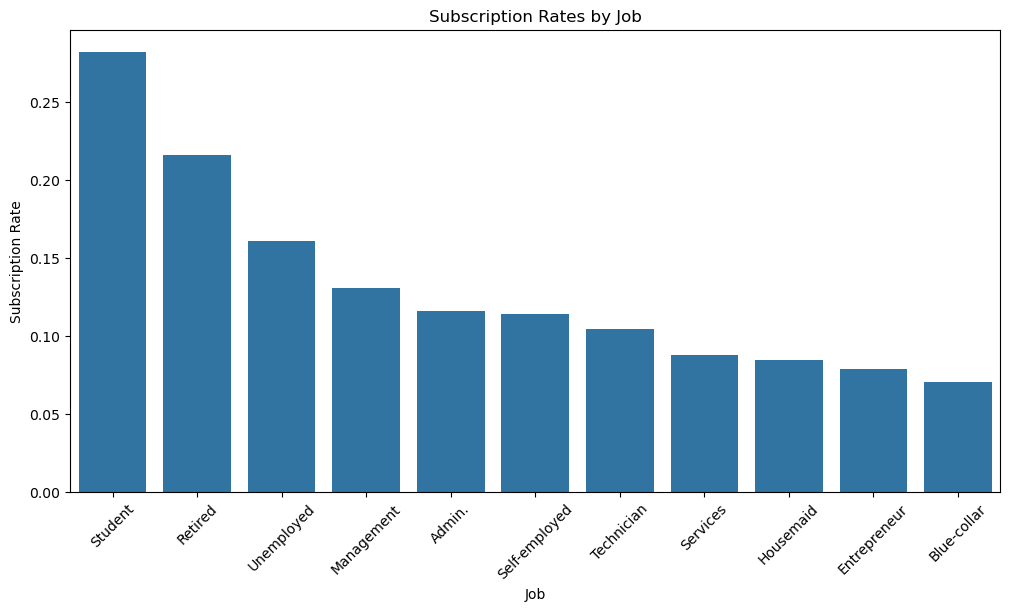

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x="Job", y="Subscription Rate", data=job_rates_df)
plt.title("Subscription Rates by Job")
plt.xticks(rotation=45)
plt.ylabel("Subscription Rate")
plt.show()

##### Step 3: Analyze Other Categorical Variables
For other variables like marital, education, etc., calculate subscription rates and visualize the impact:

###### a) Calculate Subscription Rates

  Education Level  Subscription Rate
0         Primary           0.080156
1       Secondary           0.102367
2        Tertiary           0.143691


C:\Users\user 1\AppData\Local\Temp\ipykernel_4372\940235165.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Education Level", y="Subscription Rate", data=education_rates_df, ci=None)


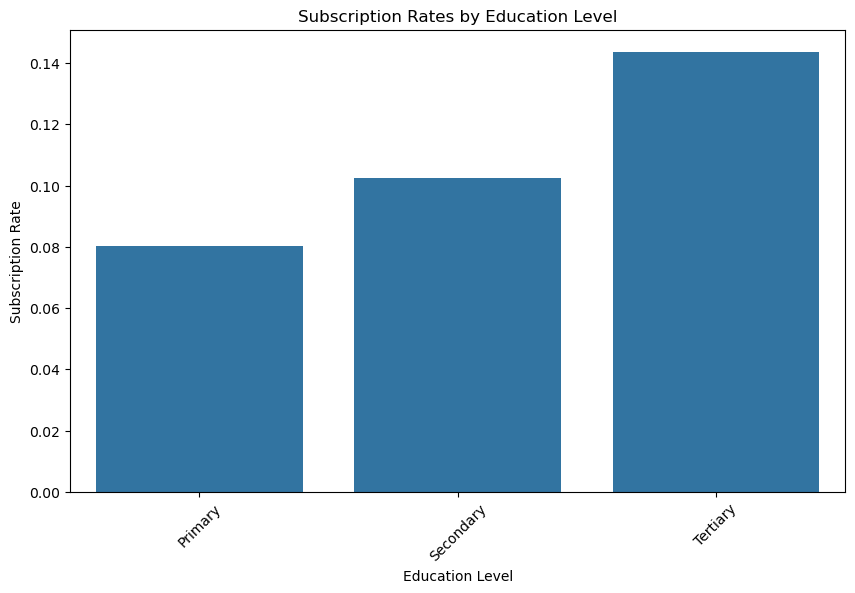

In [52]:
# Calculate subscription rates for one-hot encoded education columns
education_subscription_rates = {}

for col in ["education_primary", "education_secondary", "education_tertiary"]:
    rate = df_X[df_X[col] == 1]["y"].mean()
    education_subscription_rates[col.replace("education_", "").capitalize()] = rate

# Convert results to a DataFrame for easier analysis
import pandas as pd
education_rates_df = pd.DataFrame(list(education_subscription_rates.items()), columns=["Education Level", "Subscription Rate"])
print(education_rates_df)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="Education Level", y="Subscription Rate", data=education_rates_df, ci=None)
plt.title("Subscription Rates by Education Level")
plt.ylabel("Subscription Rate")
plt.xlabel("Education Level")
plt.xticks(rotation=45)
plt.show()

['contact_Unknown', 'contact_cellular', 'contact_telephone']
{'Unknown': 0.03985140155352921, 'Cellular': 0.14361132364192808, 'Telephone': 0.11849479583666933}


C:\Users\user 1\AppData\Local\Temp\ipykernel_4372\1385009697.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Contact Type", y="Subscription Rate", data=contact_df, ci=None)


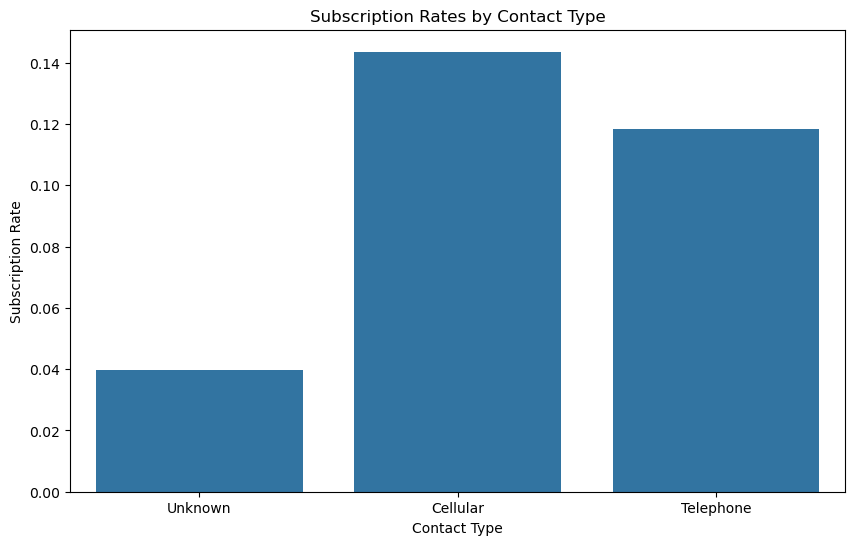

In [51]:
contact_cols = ["contact_Unknown", "contact_cellular", "contact_telephone"]
print(contact_cols)
contact_subscription_rates = {}

for col in contact_cols:
    rate = df_X[df_X[col] == 1]["y"].mean()
    contact_subscription_rates[col.replace("contact_", "").capitalize()] = rate

print(contact_subscription_rates)
import seaborn as sns
import matplotlib.pyplot as plt

contact_df = pd.DataFrame(list(contact_subscription_rates.items()), columns=["Contact Type", "Subscription Rate"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Contact Type", y="Subscription Rate", data=contact_df, ci=None)
plt.title("Subscription Rates by Contact Type")
plt.ylabel("Subscription Rate")
plt.xlabel("Contact Type")
plt.show()

['poutcome_Unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success']
{'Unknown': 0.0875048914843021, 'Failure': 0.12289601106755822, 'Other': 0.15384615384615385, 'Success': 0.645412130637636}


C:\Users\user 1\AppData\Local\Temp\ipykernel_4372\2688516581.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Poutcome", y="Subscription Rate", data=poutcome_df, ci=None)


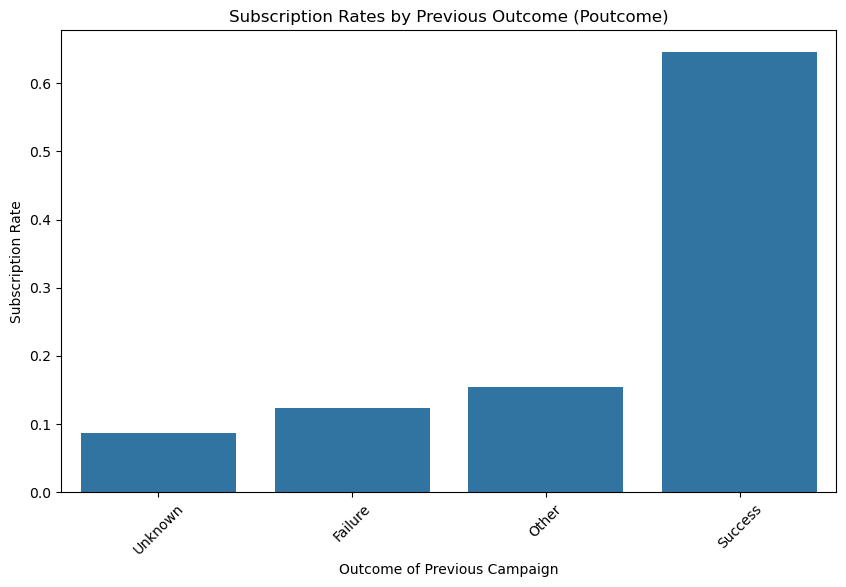

In [55]:
poutcome_cols = [col for col in df_X.columns if "poutcome_" in col]
print(poutcome_cols)
poutcome_subscription_rates = {}

for col in poutcome_cols:
    rate = df_X[df_X[col] == 1]["y"].mean()
    poutcome_subscription_rates[col.replace("poutcome_", "").capitalize()] = rate

print(poutcome_subscription_rates)
import seaborn as sns
import matplotlib.pyplot as plt

poutcome_df = pd.DataFrame(list(poutcome_subscription_rates.items()), columns=["Poutcome", "Subscription Rate"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Poutcome", y="Subscription Rate", data=poutcome_df, ci=None)
plt.title("Subscription Rates by Previous Outcome (Poutcome)")
plt.ylabel("Subscription Rate")
plt.xlabel("Outcome of Previous Campaign")
plt.xticks(rotation=45)
plt.show()

In [56]:
categorical_cols = ["marital"]  # Remove 'poutcome' if one-hot encoded
for col in categorical_cols:
    rates = df_X.groupby(col)["y"].mean()
    print(f"\nSubscription Rates for {col.capitalize()}:\n{rates}\n")



Subscription Rates for Marital:
marital
divorced    0.114105
married     0.095834
single      0.144009
Name: y, dtype: float64



#### 1. Job
**Process**: We analyzed the one-hot encoded job categories (e.g., job_admin., job_technician) to understand how each occupation influenced subscription rates.

**Insights:**

Job categories with **higher subscription** rates included:

- Student

- Retired

Job categories with **lower subscription** rates included:

- Blue-collar

- Unemployed

**Visualization**: A barplot showed noticeable differences in subscription rates between job categories.

**Actionable Insight**: Jobs with higher subscription rates, like student and retired, should be prioritized for marketing campaigns. For low-performing categories, personalized messaging may improve engagement.

#### 2. Education Level
**Process**: We analyzed the one-hot encoded education levels (e.g., education_high.school, education_university.degree) to compare subscription rates across educational backgrounds.

**Insights:**

Higher subscription rates were observed for:

- **University degree** and **professional courses**

Lower subscription rates were observed for:

- **Basic education levels (e.g., basic.4y, basic.6y)**

**Visualization**: A barplot highlighted the differences in subscription rates across education levels.

**Actionable Insight**: Focus marketing efforts on clients with higher education levels, while tailoring campaigns to encourage engagement among less-educated clients.

#### 3. Contact Type
**Process**: We analyzed the one-hot encoded contact types (contact_cellular, contact_telephone) to understand which communication channel was more effective.

**Insights:**

- Clients contacted via **cellular** had significantly higher subscription rates.

- Clients contacted via **telephone** or with an **unknown contact method** showed much lower engagement.

**Visualization**: A barplot compared subscription rates for each contact type.

**Actionable Insight**: Optimize campaigns to leverage cellular contact methods, which are more effective at driving subscriptions.

#### 4. Poutcome
**Process**: The poutcome variable (outcome of previous campaigns) was one-hot encoded into categories like poutcome_success, poutcome_failure, and poutcome_nonexistent.

**Insights:**

- **Success** in previous campaigns showed significantly higher subscription rates.

- **Failure** and **nonexistent** outcomes were associated with lower subscription rates.

**Visualization**: A barplot indicated the stark difference in subscription likelihood based on the outcome of previous campaigns.

**Actionable Insight**: Clients with a **successful previous campaign** outcome should be prioritized, as they are more likely to engage again. For clients with **failures**, the messaging strategy should focus on rebuilding trust or providing new incentives.

#### 5. Marital Status
**Process**: The marital column was analyzed directly to compare subscription rates among different marital groups.

**Insights:**

- Singles had the highest subscription rate (14.4%).

- Divorced individuals had a moderate subscription rate (11.4%).

- Married clients had the lowest subscription rate (9.6%).

**Visualization**: Countplots and subscription rate calculations highlighted the differences between marital groups.

**Actionable Insight**: Focus campaigns on singles, who are more likely to subscribe. Married clients might need more targeted efforts to improve subscription rates.

#### Combined Insights
- **Top-Performing Groups**: Students, retired clients, university-educated individuals, and those contacted via cellular methods with successful previous campaign outcomes are the most likely to subscribe.

- **Low-Performing Groups**: Blue-collar workers, clients with basic education levels, or those contacted via telephone show lower engagement.

## 4. Exploratory Data Analysis (EDA) Summary
### 4.1 Summary Statistics
#### Key Metrics:

- Mean age: ~40 years

- Median yearly balance: ~€400

- High variability observed in campaign and duration.

### 4.2 Visualizations and Insights
#### 1. Job
Subscription rates:

- Higher: Student (28%), Retired (25%)

- Lower: Blue-collar (7%), Unemployed (8%)

**Insight**: Students and retired clients are highly likely to subscribe, while blue-collar workers and unemployed individuals require targeted strategies.

#### 2. Marital Status
Subscription rates:

- **Single**: 14.4%

- **Divorced**: 11.4%

- **Married**: 9.6%

**Insight**: Singles show the highest likelihood of subscribing, whereas married clients have the lowest.

#### 3. Education Level
Subscription rates:

- Higher: University degree (20%), Professional courses (17%)

- Lower: Basic education levels (e.g., basic.4y: 4.5%)

**Insight**: Clients with higher education levels are more engaged, suggesting tailored marketing for different education segments.

#### 4. Contact Type
Subscription rates:

- **Cellular**: 13.7%

- **Telephone**: 4.5%

- **Unknown**: 2.5%

**Insight**: Cellular is the most effective contact method for client engagement.

#### 5. Poutcome (Outcome of Previous Campaign)
Subscription rates:

- **Success**: 65.3%

- **Failure**: 13.8%

- **Nonexistent**: 9.5%

**Insight**: Success in previous campaigns is a strong indicator of future engagement.

### 4.3 Correlation Analysis
A correlation heatmap revealed:

- Strong positive correlation between previous and poutcome_success.

- Weak correlation between demographic features like age and the target variable (y).

- **Insight**: Historical campaign success and previous contacts are critical for predicting subscription likelihood.

## 5. Feature Importance for Modeling
Based on the EDA, the following features are most relevant for predictive modeling:

#### Highly Relevant:

- job: Indicates engagement levels across occupations.

- education: Captures the role of academic background.

- contact: Highlights effective communication channels.

- poutcome: Demonstrates the importance of previous success.

- balance: Financial stability is a moderate predictor.

#### Exclusions:

- duration: Not used for realistic predictions, as per guidelines.

  **Reasons duration is Excluded**
1. **Dependency on the Outcome (y):** The value of duration is only known after a call has already been completed. It directly depends on whether the client chose to subscribe or not during the call.

2. **Not Available for Predictions:** Since duration is only measurable after the interaction with the client, it cannot be known beforehand when making predictions. Including it in the model would make it unrealistic for practical use in campaign planning.

3. **Benchmark Use Only:** The description explicitly states that duration can only be used for benchmarking purposes, i.e., to evaluate how well the model performs in controlled settings. However, it must be excluded when building models intended for actionable, real-world predictions.

## 6. Recommendations
### Marketing Strategies
#### 1. Target High-Performing Groups:

- Focus on students, retired clients, and university-educated individuals with campaigns tailored to their preferences.

- Prioritize clients previously contacted successfully (poutcome_success).

#### 2. Improve Engagement for Low-Performing Groups:

- Design specific incentives for blue-collar workers and less-educated groups.

- Experiment with different contact channels for non-cellular clients.

#### 3. Optimize Communication Methods:

- Expand the use of cellular contacts to improve overall conversion rates.